# MVP example
Simple trial with a unique curve and user giving min/max values for x and y

In [196]:
import deprecated_mvp.graph_reader_mvp as gr_mvp
import cv2
import matplotlib.pyplot as plt
import numpy as np
from importlib import reload
reload(gr_mvp)

<module 'deprecated_mvp.graph_reader_mvp' from 'c:\\Users\\Jeff\\OneDrive - EPITA\\coding projects\\graph-reader\\deprecated_mvp\\graph_reader_mvp.py'>

Scale coefficient X-axis: 0.19823788546255505
Scale coefficient Y-axis: 0.019174041297935103


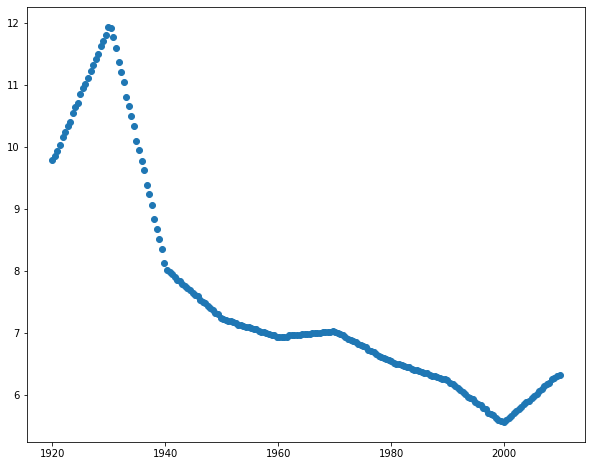

In [203]:
x0, x1 = 1920, 2010
y0, y1 = 5.5, 12
sample_line = r"sample_graphs\line simple.png"
color_img = cv2.imread(sample_line)

x, y, grey_roi, roi = gr_mvp.main_v0(color_img, x0, x1, y0, y1, nb_points=200)
plt.figure(figsize=(10, 8))
plt.scatter(x,y)
plt.show()

In [204]:
max(y)

11.942477876106196

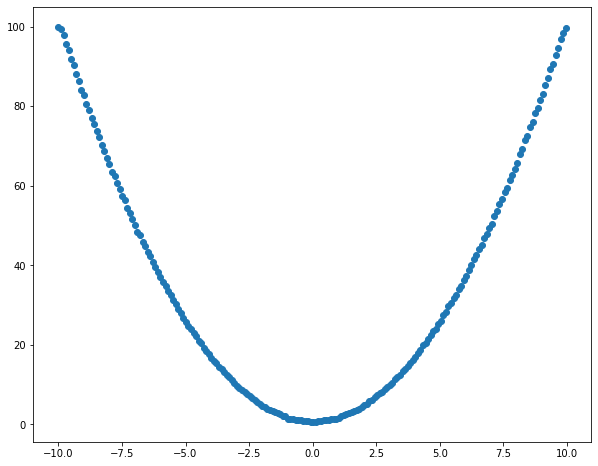

In [66]:
x0, x1 = -10, 10
y0, y1 = 0, 100
sample_line = r"sample_graphs\parabole.png"
color_img = cv2.imread(sample_line)

x, y, grey_roi, roi = gr_mvp.main_v0(color_img, x0, x1, y0, y1, nb_points=200)
plt.figure(figsize=(10, 8))
plt.scatter(x,y)
plt.show()

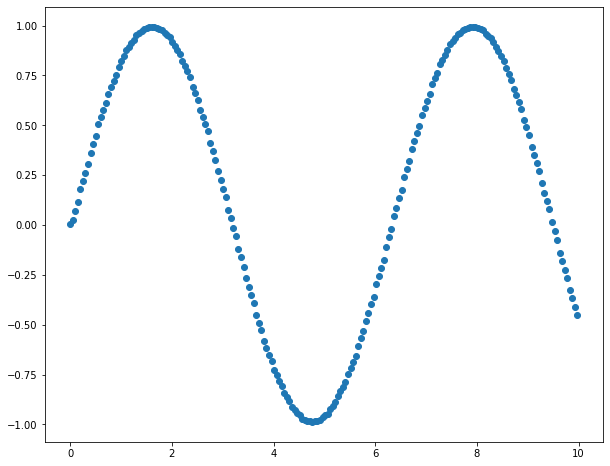

In [67]:

x0, x1 = 0, 10
y0, y1 = -1, 1
sample_line = r"sample_graphs\sin.png"
color_img = cv2.imread(sample_line)

x, y, grey_roi, roi = gr_mvp.main_v0(color_img, x0, x1, y0, y1, nb_points=200)
plt.figure(figsize=(10, 8))
plt.scatter(x,y)
plt.show()

# V0 Test:


In [37]:
import graph_reader
import cv2
import matplotlib.pyplot as plt
import numpy as np
from importlib import reload
reload(graph_reader)

<module 'graph_reader' from 'c:\\Users\\Jeff\\OneDrive - EPITA\\coding projects\\graph-reader\\graph_reader.py'>

In [38]:
sample_line = r"sample_graphs\double_sincos.png"
sample_line = r"sample_graphs\lineaire_multiple_sans_legende.png"
sample_line = r"sample_graphs\tiretee.png"
sample_line = r"sample_graphs\double_tiretee_simple.png"

gr = graph_reader.GraphReader()
gr.from_image(sample_line, 300)

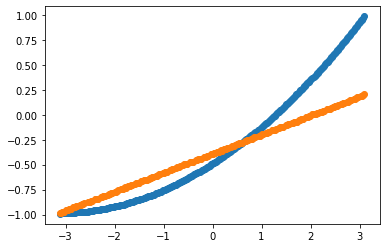

In [39]:
gr.display_graph()


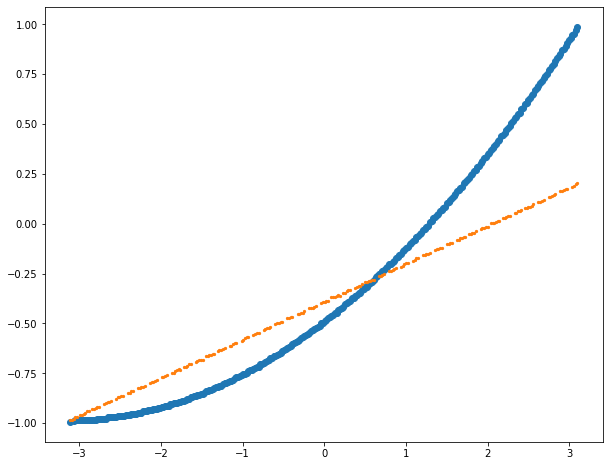

In [40]:
plt.figure(figsize=(10, 8))
plt.scatter(gr.x_points[0], gr.y_points[0])
plt.scatter(gr.x_points[1], gr.y_points[1], s=5)

# Trials

In [35]:
from sklearn.cluster import KMeans
import graph_reader
import deprecated_mvp.graph_reader_mvp as gr_mvp
import cv2
import matplotlib.pyplot as plt
import numpy as np
from importlib import reload
reload(graph_reader)
sample_line = r"sample_graphs\line simple.png"
sample_line = r"sample_graphs\double_sincos.png"
# sample_line = r"sample_graphs\lineaire_multiple.png"
# sample_line = r"sample_graphs\lineaire_multiple_sans_legende.png"
color_img = cv2.imread(sample_line)
roi = gr_mvp.get_curve_roi(color_img)
result = gr_mvp.compute_kmeans(roi, nb_clusters=3, use_HSV=False)

In [45]:
a = np.array([1, 2 ,4 ,10, 5 , 6 ,9, 10])
b = np.array([1, 2, 3, 4, 5, 6, 7, 8])

In [62]:
np.where(a==110)[0].size

0

In [58]:
if np.where(a==110)==np.array([]):
    print('a')

C:\Users\Jeff\AppData\Local\Temp/ipykernel_24268/1123321042.py:1: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if np.where(a==110)==np.array([]):


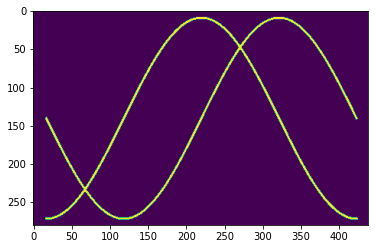

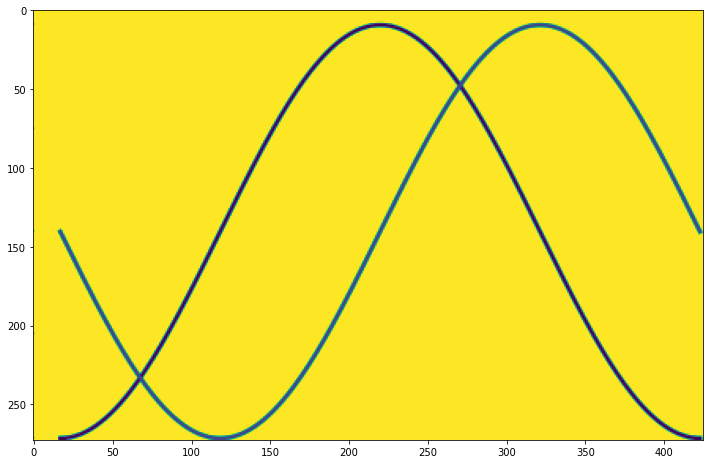

In [44]:
grey_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
_, bandw = cv2.threshold(grey_roi, 200,255,cv2.THRESH_BINARY)
# bandw = grey_roi
binary_roi = cv2.bitwise_not(bandw)
plt.imshow(binary_roi)
x_lower, y_lower, width, height = cv2.boundingRect(binary_roi)
x_upper = x_lower + width
y_upper = y_lower + height

grey_box = grey_roi[y_lower:y_upper, x_lower:x_upper]
plt.figure(figsize=(12, 9))
plt.imshow(grey_box)

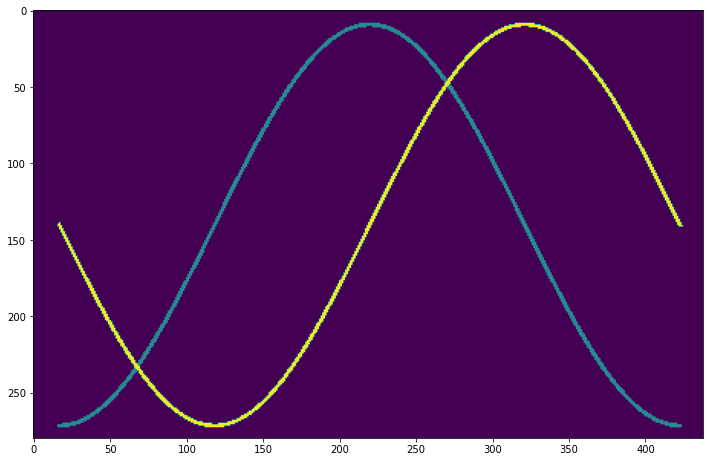

In [33]:
from matplotlib.colors import ListedColormap

plt.figure(figsize=(12, 9))
plt.imshow(result)

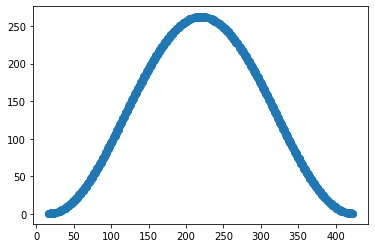

In [27]:
y, x = np.where(result==2)
plt.scatter(x, np.max(y)-y)

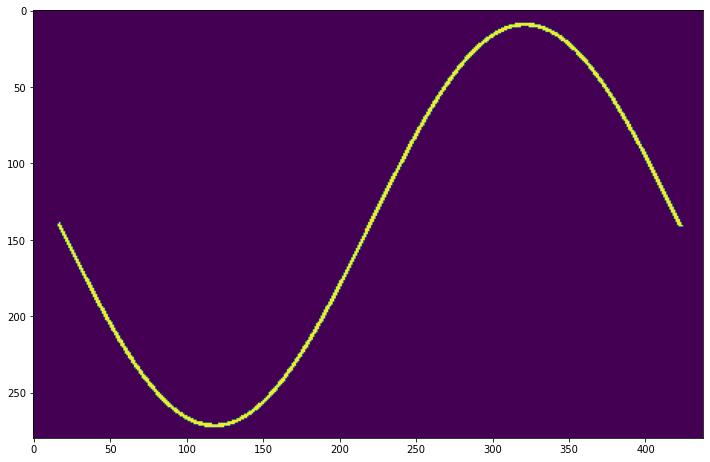

In [28]:
plt.figure(figsize=(12, 9))
plt.imshow(result==0)

# Detect axis ticks

## Trial with pattern matching
FAILED

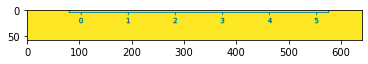

In [7]:
grey_ax = cv2.cvtColor(gr.x_axis_roi, cv2.COLOR_BGR2GRAY)
plt.imshow(grey_ax)

In [13]:
template = cv2.imread(r"sample_graphs\template_below_xticks.png", 0)
w, h = template.shape[::-1]
res = cv2.matchTemplate(grey_ax,template,cv2.TM_CCOEFF_NORMED)
threshold = 0.8
loc = np.where( res >= threshold)

for pt in zip(*loc[::-1]):
    cv2.rectangle(gr.x_axis_roi, pt, (pt[0] + w, pt[1] + h), (0,0,255), 1)
cv2.imwrite('res.png',gr.x_axis_roi)

True

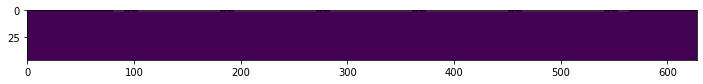

In [26]:
plt.figure(figsize=(12,10))
plt.imshow(res >0.8)
# np.where(res>0.8)

## Using houglines to detect vertical lines
The ticks are too small

In [104]:
minLineLength=3
grey_img = cv2.cvtColor(gr.x_axis_roi, cv2.COLOR_BGR2GRAY)
cv2.imwrite("bandw.jpg", grey_img)

edges = cv2.Canny(grey_img,50,150,apertureSize = 3)
cv2.imwrite('canny.jpg',edges)
lines = cv2.HoughLinesP(image=edges,rho=1,theta=np.pi/180, threshold=100,lines=np.array([]), minLineLength=minLineLength,maxLineGap=80)

a,b,c = lines.shape
for i in range(a):
    cv2.line(gr.x_axis_roi, (lines[i][0][0], lines[i][0][1]), (lines[i][0][2], lines[i][0][3]), (0, 0, 255), 1, cv2.LINE_AA)
    cv2.imwrite('houghlines5.jpg',gr.x_axis_roi)

## Manual detection
This should work but it is prone to edge cases

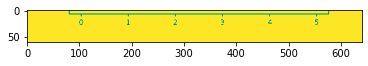

In [44]:
grey_ax = cv2.cvtColor(gr.x_axis_roi, cv2.COLOR_BGR2GRAY)
# plt.imshow(grey_ax <10)
_, bandw = cv2.threshold(grey_ax, 50,255,cv2.THRESH_BINARY)
plt.imshow(bandw)

In [17]:
def consecutive(data, stepsize=1):
    return np.split(data, np.where(np.diff(data) != stepsize)[0]+1)

In [250]:
reload(graph_reader)

sample_line = r"sample_graphs\double_tiretee_simple.png"
sample_line = r"sample_graphs\line simple.png"
sample_line = r"sample_graphs\double_sincos.png"

gr = graph_reader.GraphReader()
gr.from_image(sample_line, 300)
# x_ticks, y_ticks = gr.detect_axis_ticks()

y index 7
not found left


7.800000000000001

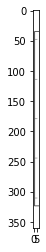

In [251]:
plt.imshow(gr.y_axis_roi[:, -9:])
gr.axis_margin * 1.3

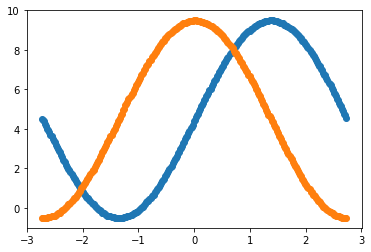

In [254]:
gr.display_graph()

In [202]:
min(gr.y_points[0])

6.057877813504823

In [212]:
x_points = [
            np.linspace(gr.x_lower + 2, gr.x_upper - 3, 200) for _ in range(len(gr.curves_index))
        ]
# y_points = [
#         gr.read_single_curve(gr.mask_curve_roi == curve_id, i) for i, curve_id in enumerate(gr.curves_index)
#     ]

In [213]:
x_points

[array([ 20.        ,  22.25628141,  24.51256281,  26.76884422,
         29.02512563,  31.28140704,  33.53768844,  35.79396985,
         38.05025126,  40.30653266,  42.56281407,  44.81909548,
         47.07537688,  49.33165829,  51.5879397 ,  53.84422111,
         56.10050251,  58.35678392,  60.61306533,  62.86934673,
         65.12562814,  67.38190955,  69.63819095,  71.89447236,
         74.15075377,  76.40703518,  78.66331658,  80.91959799,
         83.1758794 ,  85.4321608 ,  87.68844221,  89.94472362,
         92.20100503,  94.45728643,  96.71356784,  98.96984925,
        101.22613065, 103.48241206, 105.73869347, 107.99497487,
        110.25125628, 112.50753769, 114.7638191 , 117.0201005 ,
        119.27638191, 121.53266332, 123.78894472, 126.04522613,
        128.30150754, 130.55778894, 132.81407035, 135.07035176,
        137.32663317, 139.58291457, 141.83919598, 144.09547739,
        146.35175879, 148.6080402 , 150.86432161, 153.12060302,
        155.37688442, 157.63316583, 159.

In [180]:
gr.x_axis_matching
# gr.y_axis_matching

{1920.0: 86, 1940.0: 186, 1960.0: 286, 1980.0: 386, 2000.0: 486}

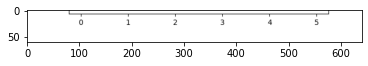

In [73]:
plt.imshow(gr.x_axis_roi)

## Trial to read axis legends with DocTR 
Did not work, I have to check if it works better with PDF or if it is just that the text is too small


In [112]:
from doctr.io import DocumentFile
from doctr.models import ocr_predictor

model = ocr_predictor(pretrained=True)
img_path = r"x_axis.jpg"
# PDF
doc = DocumentFile.from_images(img_path)
# Analyze
result = model(doc)

In [117]:
doc[0].shape

(54, 571, 3)

In [113]:
result

Document(
  (pages): [Page(
    dimensions=(54, 571)
    (blocks): []
  )]
)

## Trial to read axis legends with Tesseract

In [99]:
import pytesseract
from pytesseract.pytesseract import Output

pytesseract.pytesseract.tesseract_cmd = 'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'

In [231]:
boxes = pytesseract.image_to_data(gr.x_axis_roi, output_type=Output.DICT )
boxes = pytesseract.image_to_data(gr.y_axis_roi[:, 25:], output_type=Output.DICT, config="--psm 6 digits" )
scaling_ratio = 3
bigger = cv2.resize(gr.y_axis_roi, np.array(gr.y_axis_roi.shape[:2][::-1]) * scaling_ratio)
bigger = cv2.erode(bigger, None, iterations=2)
bigger = cv2.dilate(bigger, None, iterations=1)
# boxes = pytesseract.image_to_data(bigger[:, 55:], output_type=Output.DICT, config="--psm 6 digits" )
boxes = pytesseract.image_to_data(bigger[:, :], output_type=Output.DICT, config="--psm 6 digits" )
# boxes = pytesseract.image_to_data(gr.title_roi, output_type=Output.DICT )

In [165]:
boxes.keys()

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])

In [232]:
legend = []
axis_values = []

def is_number(s):
    """ Returns True is string is a number. """
    return s.replace('.','',1).replace('-', '', 1).isdigit()

for txt, left, top, width, height in zip(boxes["text"], boxes["left"], boxes["top"], boxes["width"], boxes["height"]):
    if not txt or txt ==" ":
        continue
    if is_number(txt):
        print("axis value", txt)
        axis_values.append({"text": float(txt), "center_x": left + width/2, "center_y": top + height/2})
    else:
        print("legend", txt)
        legend.append({"text": txt, "center_x": left + width/2, "center_y": top + height/2})

axis value 10
axis value 0.5
axis value 0.0
axis value 0.5
axis value -1.0


In [222]:
t = '0.0'
t.isdigit()

False

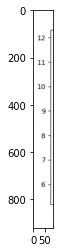

In [163]:
# update = cv2.dilate(gr.y_axis_roi, None, iterations=1)
# update = cv2.erode(gr.y_axis_roi, None, iterations=1)
# plt.imshow(update)
bigger = cv2.resize(gr.y_axis_roi, np.array(gr.y_axis_roi.shape[:2][::-1]) * 2)
# bigger = cv2.erode(bigger, None, iterations=2)
# bigger = cv2.dilate(bigger, None, iterations=1)
plt.imshow(bigger[:, 55:])

In [109]:
axis_values

[{'text': 1940.0, 'center_x': 187.0, 'center_y': 23.0},
 {'text': 1960.0, 'center_x': 287.0, 'center_y': 23.0},
 {'text': 1980.0, 'center_x': 387.0, 'center_y': 23.0},
 {'text': 2000.0, 'center_x': 487.0, 'center_y': 23.0}]

# To clean

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [25]:
sample_line = r"C:\Users\Jeff\OneDrive - EPITA\coding projects\Graph Vision\sample graph\line simple.png"
color_img = cv2.imread(sample_line)

grey_img = cv2.cvtColor(color_img, cv2.COLOR_BGR2GRAY)
ret, thresh_img = cv2.threshold(color_img, 30,255,cv2.THRESH_BINARY)

cv2.imwrite("bandw.jpg", grey_img)
cv2.imwrite("thresh.jpg", thresh_img)
edges = cv2.Canny(grey_img,50,150,apertureSize = 3)
cv2.imwrite('canny.jpg',edges)
# minLineLength=100
# lines = cv2.HoughLinesP(image=edges,rho=1,theta=np.pi/180, threshold=100,lines=np.array([]), minLineLength=minLineLength,maxLineGap=80)

# a,b,c = lines.shape
# for i in range(a):
#     cv2.line(color_img, (lines[i][0][0], lines[i][0][1]), (lines[i][0][2], lines[i][0][3]), (0, 0, 255), 3, cv2.LINE_AA)
#     cv2.imwrite('houghlines5.jpg',color_img)

True

In [27]:
#Find my contours
contours =cv2.findContours(edges,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)[0]


min_area = color_img.shape[0] * color_img.shape[1] / 2
print(min_area)
#Loop through my contours to find rectangles and put them in a list, so i can view them individually later.
cntrRect = []
for i in contours:
        epsilon = 0.05*cv2.arcLength(i,True)
        approx = cv2.approxPolyDP(i,epsilon,True)
        if len(approx) == 4 and cv2.contourArea(i) > min_area:
            print(cv2.contourArea(i))
            cntrRect.append(approx)
            cv2.drawContours(color_img, cntrRect, -1, (0, 255, 0), 2)
            cv2.imwrite('contour.jpg', color_img)



cv2.waitKey(0)
cv2.destroyAllWindows()

131615.5
184864.0


In [35]:
rectangle = np.squeeze(cntrRect[0])
x_min, y_min = np.min(rectangle, axis=0)
x_max, y_max = np.max(rectangle, axis=0)

In [44]:
margin = 3
roi = color_img[y_min+margin: y_max-margin, x_min+margin: x_max-margin]

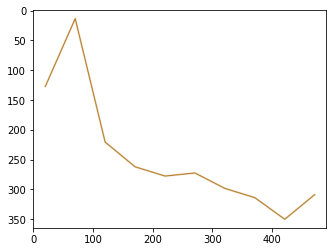

In [45]:
plt.imshow(roi)

In [83]:
bin_roi = cv2.bitwise_not(grey_roi)

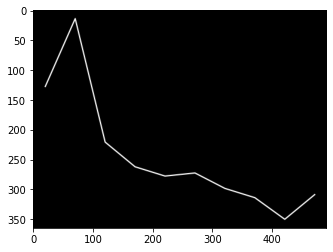

In [84]:
plt.imshow(bin_roi, cmap='gray')

x1: 19 x2: 473 y1: 13 y2: 352


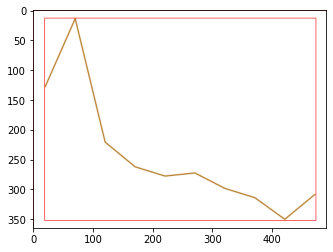

In [86]:
# Generate variables
x1,y1,w,h = cv2.boundingRect(bin_roi)
x2 = x1+w
y2 = y1+h

# Draw bounding rectangle
start = (x1, y1)
end = (x2, y2)
colour = (255, 0, 0)
thickness = 1
rectangle_img = cv2.rectangle(roi, start, end, colour, thickness)
print("x1:", x1, "x2:", x2, "y1:", y1, "y2:", y2)
plt.imshow(rectangle_img, cmap="gray")